# 特長抽出

### 主成分分析

データの読み込み

In [1]:
import pandas as pd
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [2]:
df_wine.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


データの分割と標準化

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

特徴量の分散共分散行列を作る

In [7]:
import numpy as np

# 分散共分散行列を生成
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [8]:
# 固有値と固有ベクトルを計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

In [9]:
eigen_vecs

array([[-1.37242175e-01,  5.03034778e-01, -1.37748734e-01,
        -3.29610003e-03, -2.90625226e-01,  2.99096847e-01,
         7.90529293e-02, -3.68176414e-01, -3.98377017e-01,
        -9.44869777e-02,  3.74638877e-01, -1.27834515e-01,
         2.62834263e-01],
       [ 2.47243265e-01,  1.64871190e-01,  9.61503863e-02,
         5.62646692e-01,  8.95378697e-02,  6.27036396e-01,
        -2.74002014e-01, -1.25775752e-02,  1.10458230e-01,
         2.63652406e-02, -1.37405597e-01,  8.06401578e-02,
        -2.66769211e-01],
       [-2.54515927e-02,  2.44564761e-01,  6.77775667e-01,
        -1.08977111e-01, -1.60834991e-01,  3.89128239e-04,
         1.32328045e-01,  1.77578177e-01,  3.82496856e-01,
         1.42747511e-01,  4.61583035e-01,  1.67924873e-02,
        -1.15542548e-01],
       [ 2.06945084e-01, -1.13529045e-01,  6.25040550e-01,
         3.38187002e-02,  5.15873402e-02, -4.05836452e-02,
         2.23999097e-01, -4.40592110e-01, -2.43373853e-01,
        -1.30485780e-01, -4.18953989e

### 全分散と説明分散

In [10]:
# 固有値を計算
tot = sum(eigen_vals)

# 分散説明率を計算
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

# var_expの累積和を取得
cum_var_exp = np.cumsum(var_exp)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

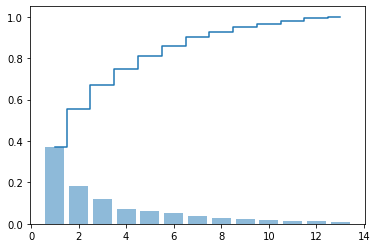

In [12]:
# 分散説明率の棒グラフ
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')

# cum_var_expの階段グラフ
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explaned variance')

### 特長変換

固有値を大きいものから順に降順で並べ替える

In [13]:
# 固有値と固有ベクトルを対にしたタプルを生成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs

[(4.842745315655895,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.416024587035225,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203524,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977378,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578416,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114, 

In [14]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [15]:
# 上から二つに対応する2つの固有ベクトルを集める
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [16]:
# 元々の行列X（13個の特徴量）から新しい行列（2個の特徴量）を生成
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

これを全てのデータに対して適応すると・・・

In [17]:
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

### sklearnを使ってPCAを行う

決定領域のプロットをするために、以前扱ったplot_decision_regions関数を使う  
ちょっと手を加える

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # グリッド配列を1次元にする(各特徴量を1次元配列に直してから予測を実行)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測した結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 値の範囲
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')

sklearnを使ってPCAを行う

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# pcaのインスタンス(主成分は2つ)
pca = PCA(n_components=2)

lr = LogisticRegression()

# トレーニングデータとテストデータでPCAを実行
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# ロジスティック回帰をしてみる
lr.fit(X_train_pca, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

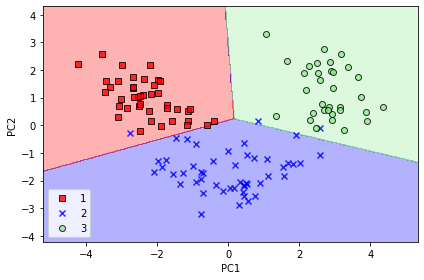

In [20]:
# 決定協会をプロット
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
